# Alzheimer's Disease Prediction 

#### This model is used to predict Alzheimer's disease in patients using the patient's medical information.
___

## Reading Data 

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Model/alzheimers_disease_data.csv')

##  Understanding Data 

In [3]:
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [4]:
df.shape

(2149, 35)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientID,2149.0,5825.000000,620.507185,4751.000000,5288.000000,5825.000000,6362.000000,6899.000000
Age,2149.0,74.908795,8.990221,60.000000,67.000000,75.000000,83.000000,90.000000
Gender,2149.0,0.506282,0.500077,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2149.0,0.697534,0.996128,0.000000,0.000000,0.000000,1.000000,3.000000
EducationLevel,2149.0,1.286645,0.904527,0.000000,1.000000,1.000000,2.000000,3.000000
BMI,2149.0,27.655697,7.217438,15.008851,21.611408,27.823924,33.869778,39.992767
Smoking,2149.0,0.288506,0.453173,0.000000,0.000000,0.000000,1.000000,1.000000
AlcoholConsumption,2149.0,10.039442,5.757910,0.002003,5.139810,9.934412,15.157931,19.989293
PhysicalActivity,2149.0,4.920202,2.857191,0.003616,2.570626,4.766424,7.427899,9.987429
DietQuality,2149.0,4.993138,2.909055,0.009385,2.458455,5.076087,7.558625,9.998346


## Data Visualization 

In [7]:
from matplotlib import pyplot as plt 
import seaborn as sns

- Replace 0 with Male, 1 with Female (column 'Gender')¶
- Replace 0 with Caucasian, 1 with African American, 2 with Asian, 3 with Other (column 'Ethnicity')
- Replace 0 with None, 1 with High School, 2 with Bachelor's, 3 with Higher (column 'EducationLevel')
- Replace 0 with No, 1 with Yes (column 'Smoking')
- Replace 0 with No, 1 with Yes (column 'FamilyHistoryAlzheimers')
- Replace 0 with No, 1 with Yes (column 'CardiovascularDisease')
- Replace 0 with No, 1 with Yes (column 'Diabetes')
- Replace 0 with No, 1 with Yes (column 'Depression')
- Replace 0 with No, 1 with Yes (column 'HeadInjury')
- Replace 0 with No, 1 with Yes (column 'Hypertension')
- Replace 0 with No, 1 with Yes (column 'MemoryComplaints')
- Replace 0 with No, 1 with Yes (column 'BehavioralProblems')
- Replace 0 with No, 1 with Yes (column 'Confusion')
- Replace 0 with No, 1 with Yes (column 'Disorientation')
- Replace 0 with No, 1 with Yes (column 'PersonalityChanges')
- Replace 0 with No, 1 with Yes (column 'DifficultyCompletingTasks')
- Replace 0 with No, 1 with Yes (column 'Forgetfulness')
- Replace 0 with No, 1 with Yes (column 'Diagnosis')

In [8]:
data = pd.DataFrame(df)
data['Gender'] = df['Gender'].map({0: 'Male', 1: 'Female'})
data['Ethnicity'] = df['Ethnicity'].map({0: 'Caucasian', 1: 'African American', 2: 'Asian', 3: 'Other'})
data['EducationLevel'] = df['EducationLevel'].map({0: 'None', 1: 'High School', 2: 'Bachelor', 3: 'Higher'})
data['Smoking'] = df['Smoking'].map({0: 'No', 1: 'Yes'})
data['FamilyHistoryAlzheimers'] = df['FamilyHistoryAlzheimers'].map({0: 'No', 1: 'Yes'})
data['CardiovascularDisease'] = df['CardiovascularDisease'].map({0: 'No', 1: 'Yes'})
data['Diabetes'] = df['Diabetes'].map({0: 'No', 1: 'Yes'}) 
data['Depression'] = df['Depression'].map({0: 'No', 1: 'Yes'})  
data['HeadInjury'] = df['HeadInjury'].map({0: 'No', 1: 'Yes'})  
data['Hypertension'] = df['Hypertension'].map({0: 'No', 1: 'Yes'})  
data['MemoryComplaints'] = df['MemoryComplaints'].map({0: 'No', 1: 'Yes'}) 
data['BehavioralProblems'] = df['BehavioralProblems'].map({0: 'No', 1: 'Yes'}) 
data['Confusion'] = df['Confusion'].map({0: 'No', 1: 'Yes'}) 
data['Disorientation'] = df['Disorientation'].map({0: 'No', 1: 'Yes'}) 
data['PersonalityChanges'] = df['PersonalityChanges'].map({0: 'No', 1: 'Yes'}) 
data['DifficultyCompletingTasks'] = df['DifficultyCompletingTasks'].map({0: 'No', 1: 'Yes'}) 
data['Forgetfulness'] = df['Forgetfulness'].map({0: 'No', 1: 'Yes'}) 
data['Diagnosis'] = df['Diagnosis'].map({0: 'No', 1: 'Yes'}) 

In [9]:
data.select_dtypes(include= 'number').columns

Index(['PatientID', 'Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity',
       'DietQuality', 'SleepQuality', 'SystolicBP', 'DiastolicBP',
       'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'ADL'],
      dtype='object')

In [10]:
data.select_dtypes(include= 'object').columns

Index(['Gender', 'Ethnicity', 'EducationLevel', 'Smoking',
       'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes',
       'Depression', 'HeadInjury', 'Hypertension', 'MemoryComplaints',
       'BehavioralProblems', 'Confusion', 'Disorientation',
       'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness',
       'Diagnosis', 'DoctorInCharge'],
      dtype='object')

In [11]:
numeric_features = data[['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal',
       'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE',
       'FunctionalAssessment', 'ADL']]

categorical_features = data[['Gender', 'Ethnicity', 'EducationLevel', 'Smoking',
       'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes',
       'Depression', 'HeadInjury', 'Hypertension', 'MemoryComplaints',
       'BehavioralProblems', 'Confusion', 'Disorientation',
       'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness',
       'Diagnosis']]

### Show Distributions of Numeric Features

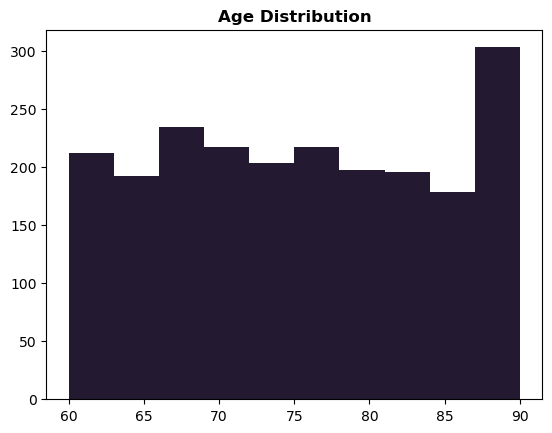

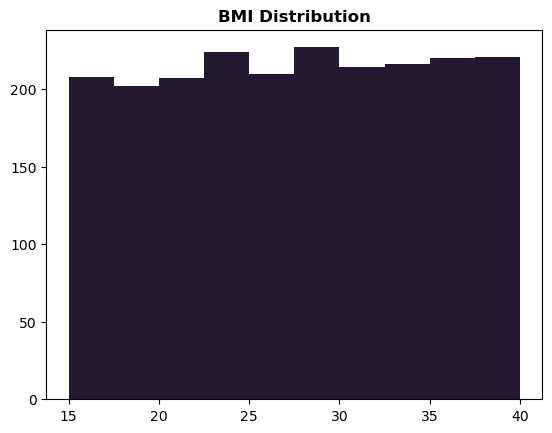

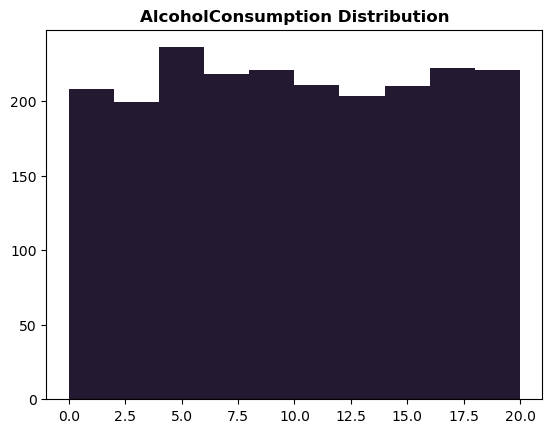

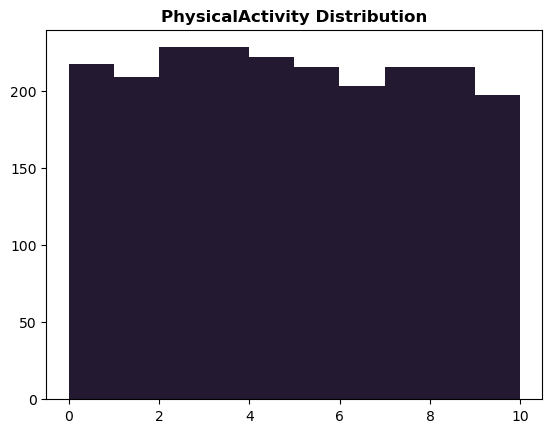

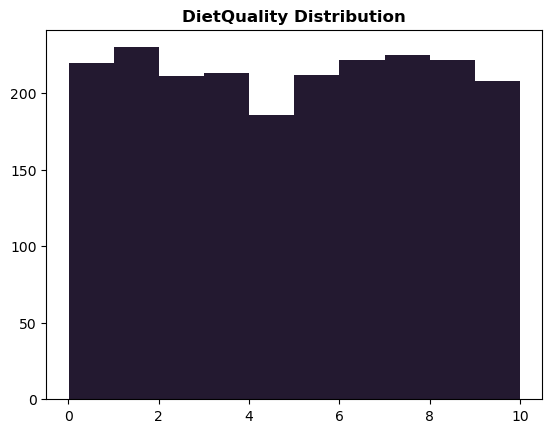

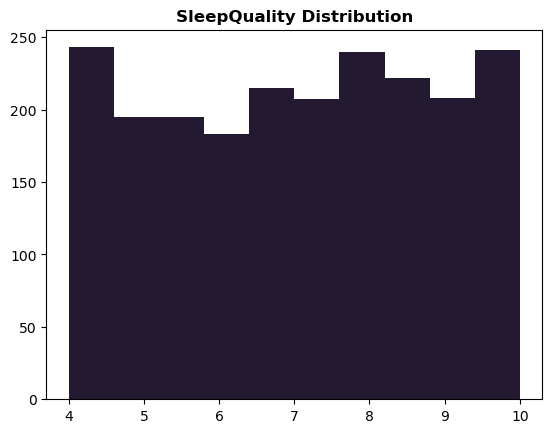

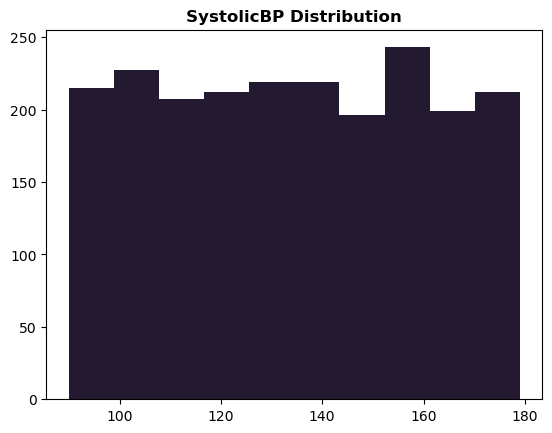

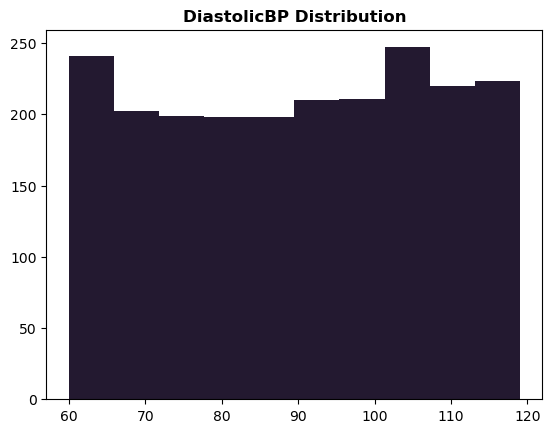

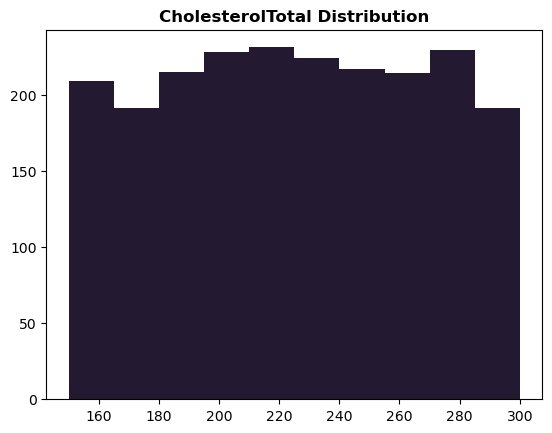

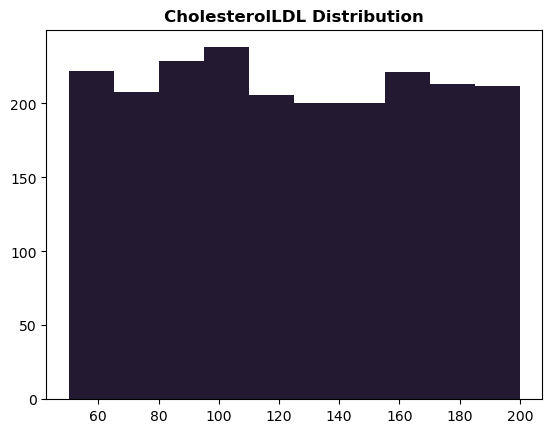

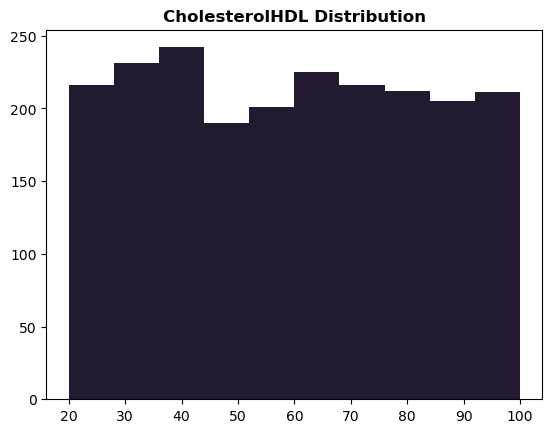

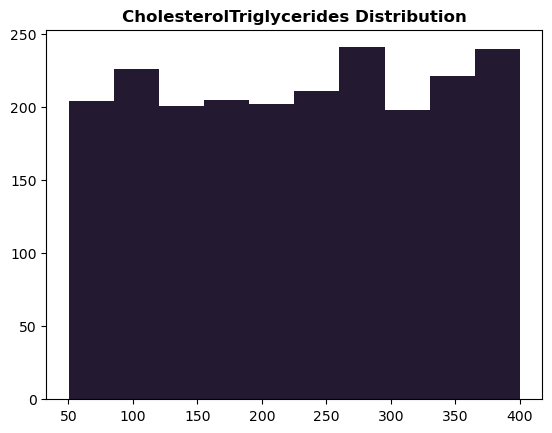

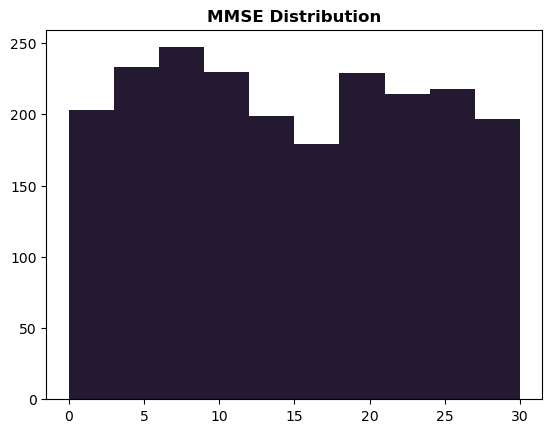

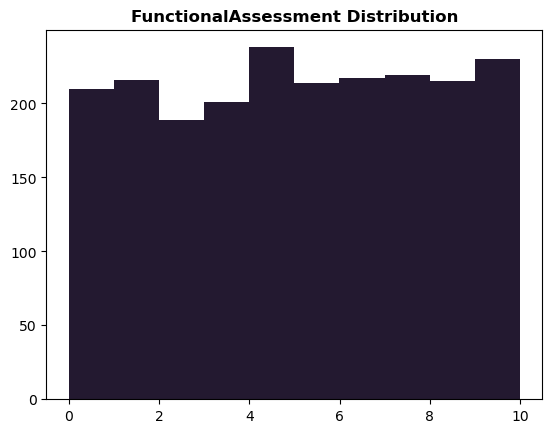

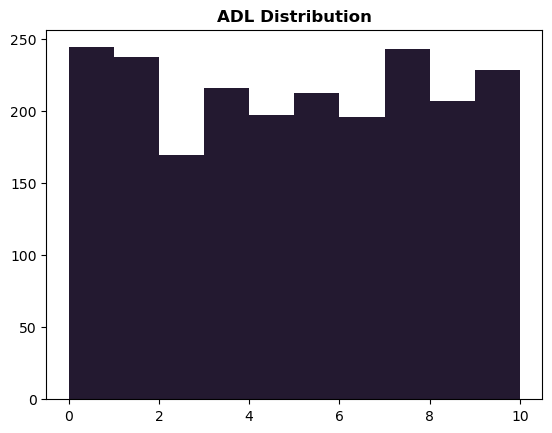

In [12]:
for i in numeric_features.columns : 
    plt.hist(x = numeric_features[i], color = '#231930')
    plt.title(i + ' Distribution', weight = 'bold')
    plt.show()

### Show Distributions of Categorical Features

C:\Users\moham\AppData\Local\Temp\ipykernel_17104\3106992072.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = categorical_features[i], palette = 'tab10')


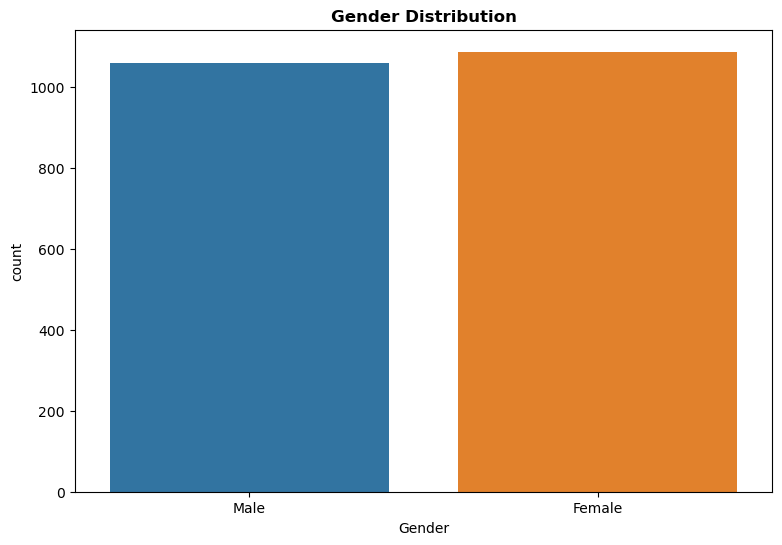

C:\Users\moham\AppData\Local\Temp\ipykernel_17104\3106992072.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = categorical_features[i], palette = 'tab10')


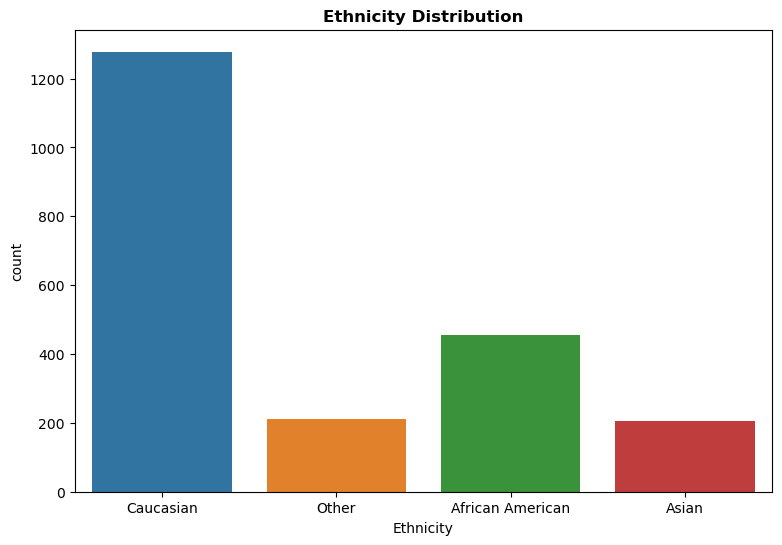

C:\Users\moham\AppData\Local\Temp\ipykernel_17104\3106992072.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = categorical_features[i], palette = 'tab10')


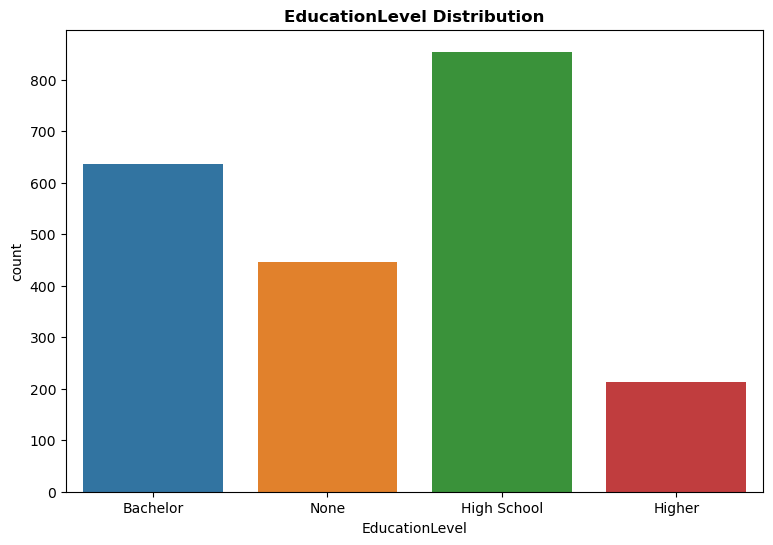

C:\Users\moham\AppData\Local\Temp\ipykernel_17104\3106992072.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = categorical_features[i], palette = 'tab10')


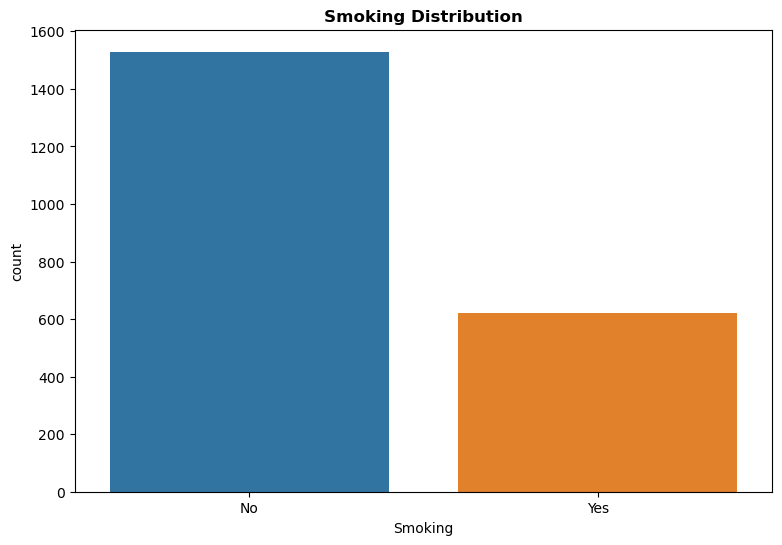

C:\Users\moham\AppData\Local\Temp\ipykernel_17104\3106992072.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = categorical_features[i], palette = 'tab10')


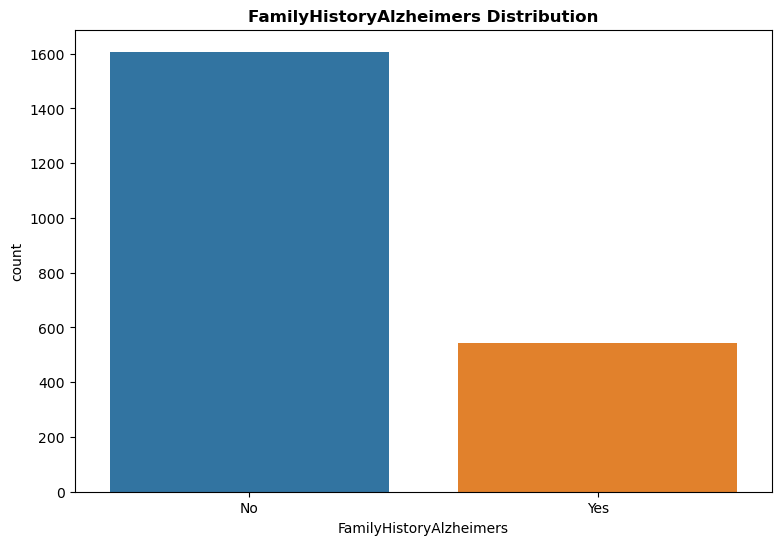

C:\Users\moham\AppData\Local\Temp\ipykernel_17104\3106992072.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = categorical_features[i], palette = 'tab10')


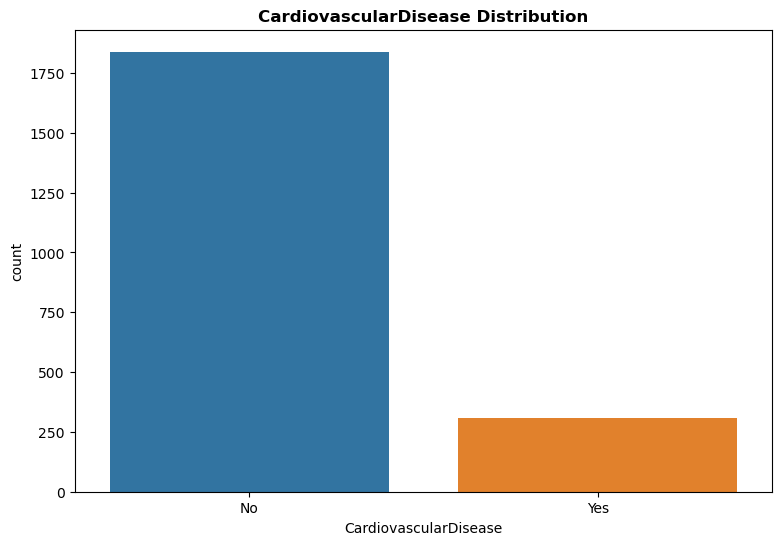

C:\Users\moham\AppData\Local\Temp\ipykernel_17104\3106992072.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = categorical_features[i], palette = 'tab10')


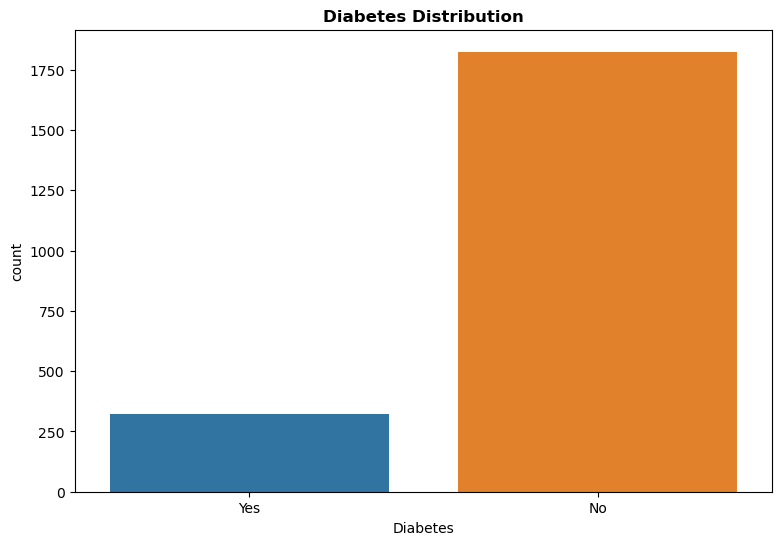

C:\Users\moham\AppData\Local\Temp\ipykernel_17104\3106992072.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = categorical_features[i], palette = 'tab10')


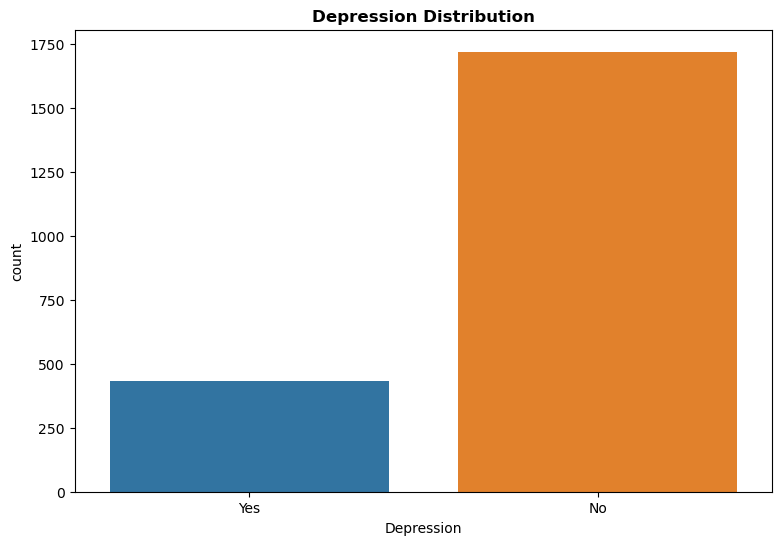

C:\Users\moham\AppData\Local\Temp\ipykernel_17104\3106992072.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = categorical_features[i], palette = 'tab10')


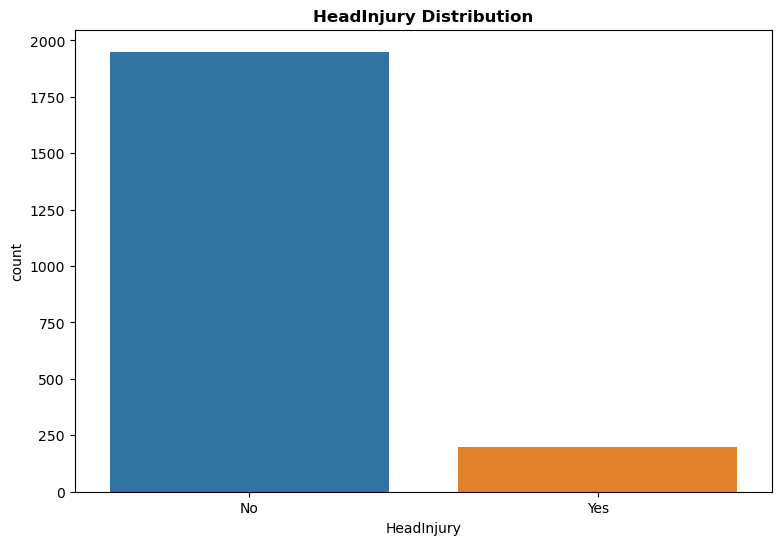

C:\Users\moham\AppData\Local\Temp\ipykernel_17104\3106992072.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = categorical_features[i], palette = 'tab10')


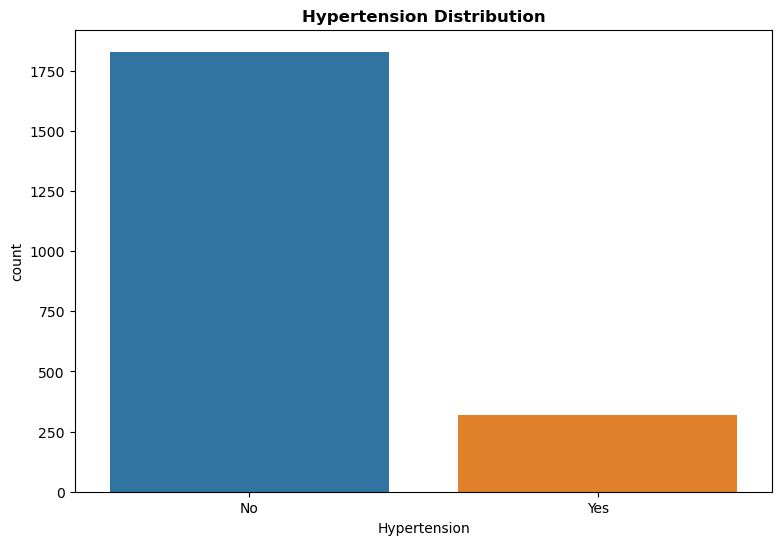

C:\Users\moham\AppData\Local\Temp\ipykernel_17104\3106992072.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = categorical_features[i], palette = 'tab10')


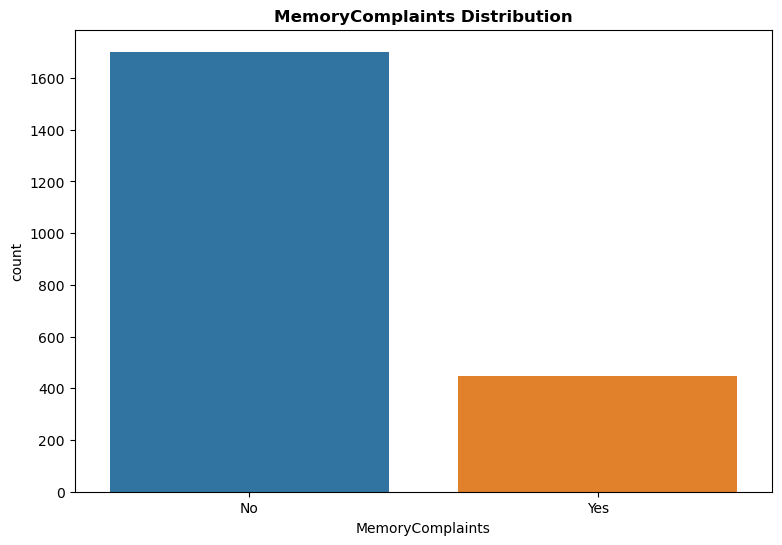

C:\Users\moham\AppData\Local\Temp\ipykernel_17104\3106992072.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = categorical_features[i], palette = 'tab10')


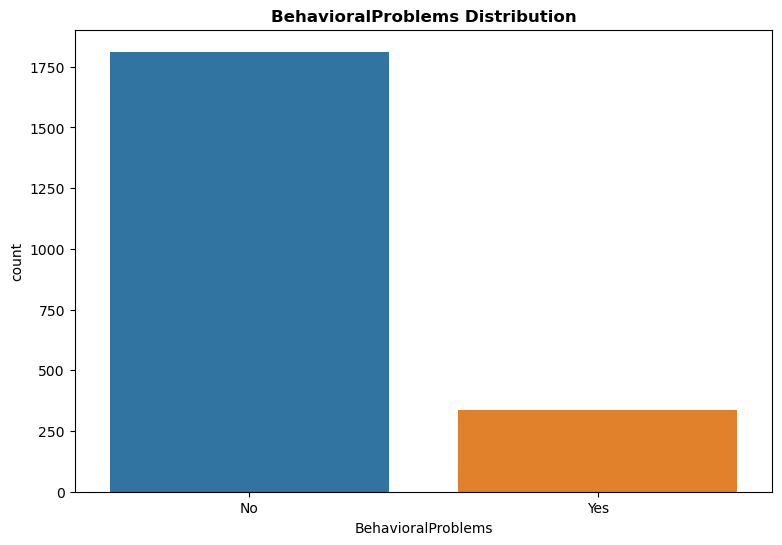

C:\Users\moham\AppData\Local\Temp\ipykernel_17104\3106992072.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = categorical_features[i], palette = 'tab10')


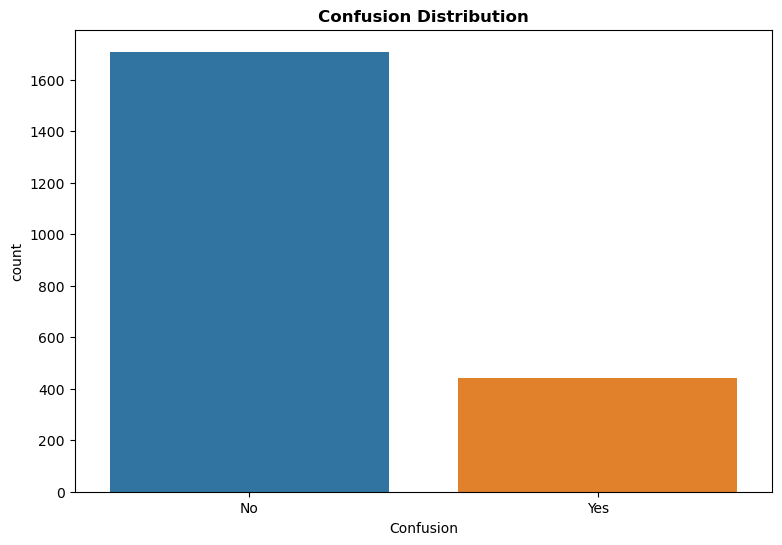

C:\Users\moham\AppData\Local\Temp\ipykernel_17104\3106992072.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = categorical_features[i], palette = 'tab10')


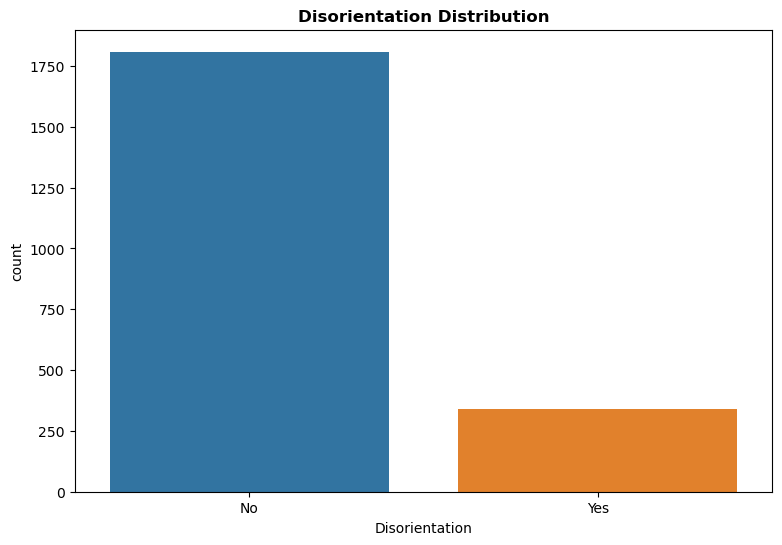

C:\Users\moham\AppData\Local\Temp\ipykernel_17104\3106992072.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = categorical_features[i], palette = 'tab10')


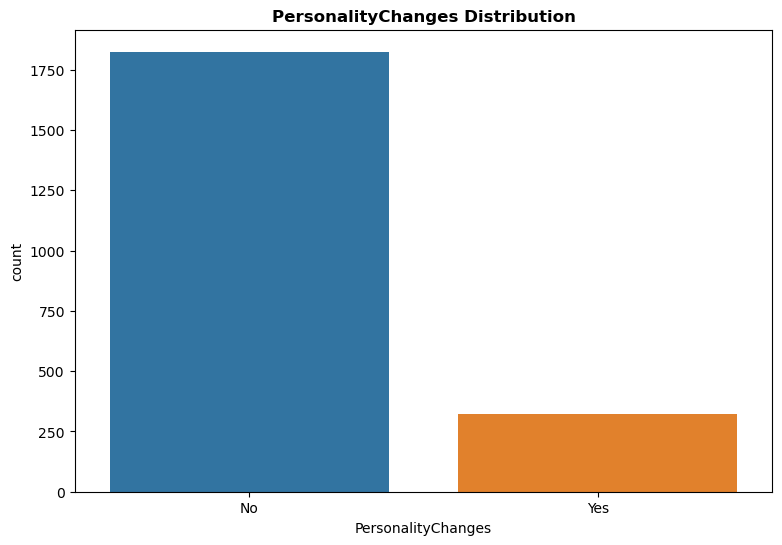

C:\Users\moham\AppData\Local\Temp\ipykernel_17104\3106992072.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = categorical_features[i], palette = 'tab10')


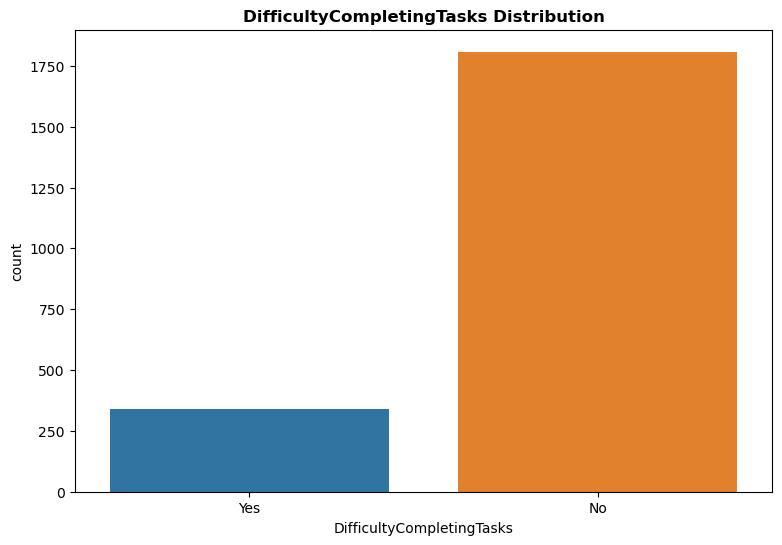

C:\Users\moham\AppData\Local\Temp\ipykernel_17104\3106992072.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = categorical_features[i], palette = 'tab10')


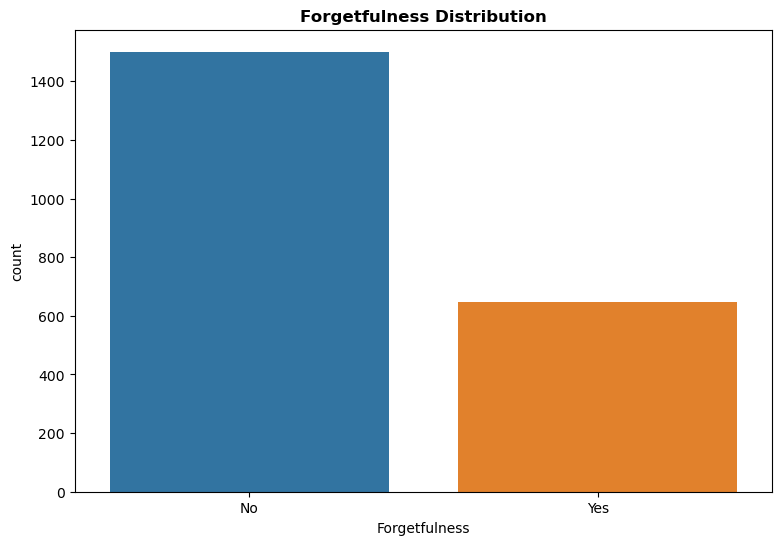

C:\Users\moham\AppData\Local\Temp\ipykernel_17104\3106992072.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = categorical_features[i], palette = 'tab10')


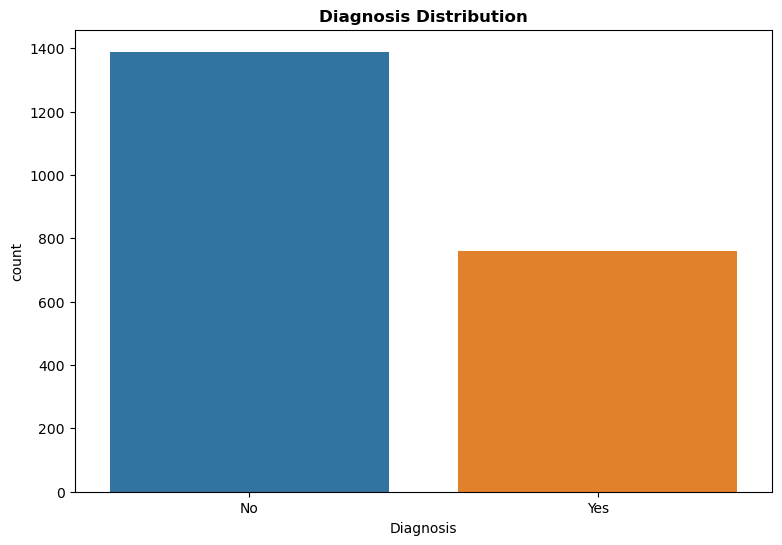

In [13]:
for i in categorical_features.columns:
    plt.figure(figsize = (9,6))
    plt.title(i + ' Distribution', weight = 'bold')
    sns.countplot(x = categorical_features[i], palette = 'tab10')
    plt.show()

### Show Distributions of Diagnosis Feature

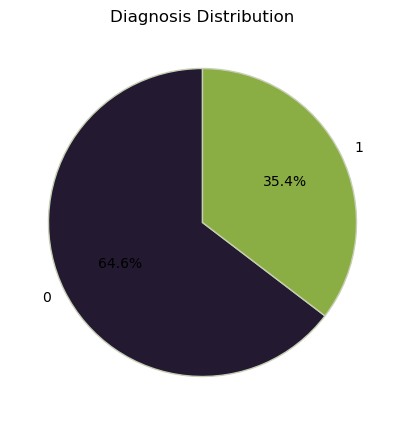

In [14]:
plt.figure(figsize=(5, 5))
df['Diagnosis'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#231930', '#8aad44'], wedgeprops={'linewidth': 1, 'edgecolor': '#c6cfb4'})
plt.title('Diagnosis Distribution')
plt.ylabel('')
plt.show()

## Data Cleaning And Preparing

#### Drop Useless Features

In [15]:
df.drop(['PatientID', 'DoctorInCharge'], axis=1,inplace=True)
df.reset_index(inplace=True)

In [16]:
df.drop('index',axis=1,inplace=True)

#### Check Nulls 

In [17]:
df.isna().sum()

Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfulness                0
Diagnosi

#### Check Outliers 

In [18]:
import numpy as np 

In [19]:
columns = list(df.columns)

In [20]:
for i in columns : 
    print(f'values counts for {i} \n{df[i].value_counts()} \n','_'*50)

values counts for Age 
Age
88    84
68    84
72    82
76    81
71    80
90    79
67    77
60    74
70    74
66    73
89    72
77    72
78    72
84    71
83    71
62    70
63    69
80    68
61    68
87    68
82    68
73    66
65    64
75    64
69    63
64    59
79    57
85    57
81    57
74    55
86    50
Name: count, dtype: int64 
 __________________________________________________
values counts for Gender 
Gender
1    1088
0    1061
Name: count, dtype: int64 
 __________________________________________________
values counts for Ethnicity 
Ethnicity
0    1278
1     454
3     211
2     206
Name: count, dtype: int64 
 __________________________________________________
values counts for EducationLevel 
EducationLevel
1    854
2    636
0    446
3    213
Name: count, dtype: int64 
 __________________________________________________
values counts for BMI 
BMI
22.927749    1
37.002439    1
29.549056    1
23.715891    1
26.197217    1
            ..
20.352158    1
36.970870    1
28.204418    1

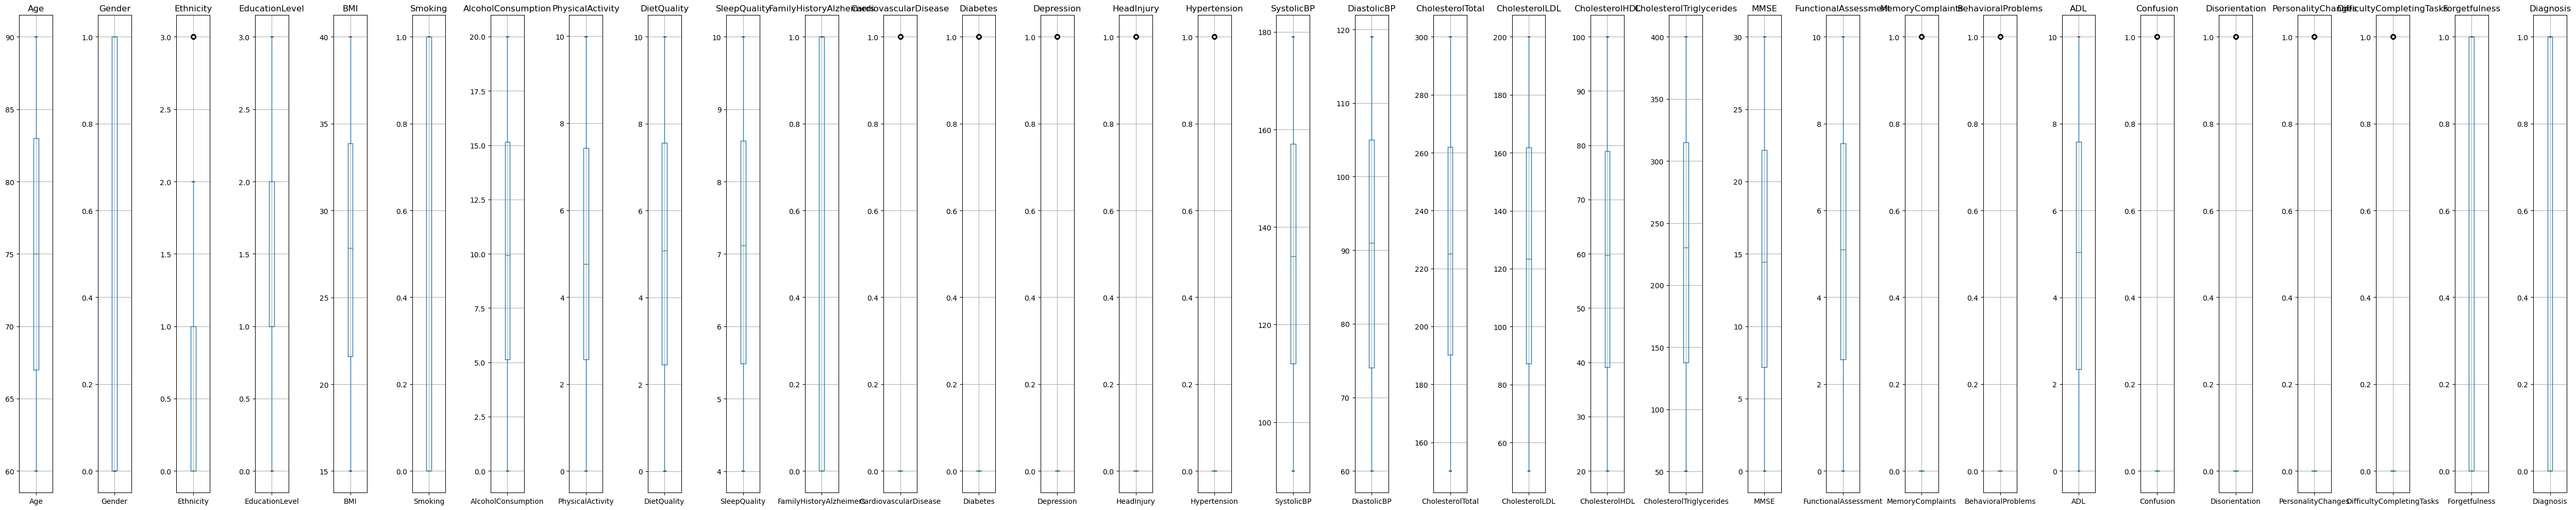

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=len(df.columns), figsize=(50, 10))

for i, column in enumerate(df.columns):
    df.boxplot(column=column, ax=axes[i])
    axes[i].set_title(f'{column}')

plt.tight_layout()
plt.show()

## Feature Selection 

In [22]:
from sklearn.feature_selection import SelectPercentile ,f_classif 

In [23]:
FeatureData = df.drop(['Diagnosis'], axis=1)
TargetData = df['Diagnosis']

In [24]:
def FeatureSelectionByPrecentile(x,y,percentile) :
    SelectPercentileModel = SelectPercentile(score_func=f_classif,percentile=percentile)
    SelectFeature = SelectPercentileModel.fit_transform(x,y)
    finalData = pd.DataFrame(SelectFeature, columns=[i for i,j in zip(x.columns,SelectPercentileModel.get_support()) if j])
    finalData['Diagnosis'] = y
    return finalData

In [25]:
finalData = FeatureSelectionByPrecentile(FeatureData,TargetData,80)

In [26]:
finalData.shape

(2149, 26)

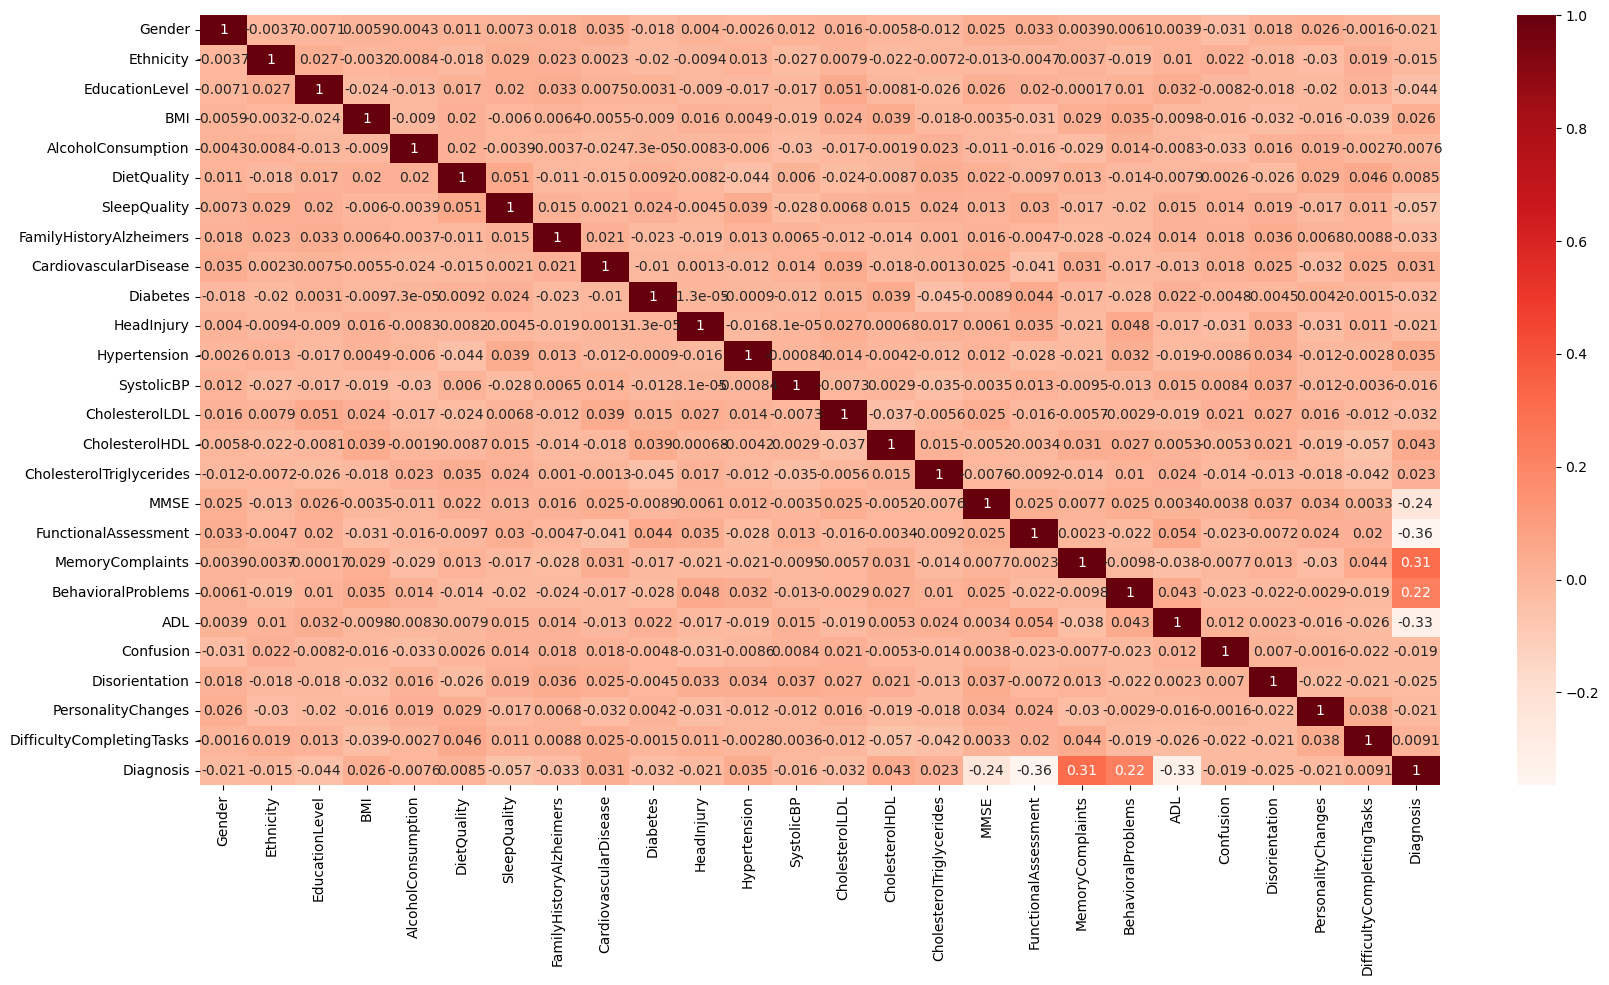

In [27]:
corr = finalData.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, cmap="Reds",annot=True)
plt.show()

## Traning Model 

In [28]:
from sklearn.model_selection import train_test_split, GridSearchCV , LearningCurveDisplay, learning_curve
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay, PredictionErrorDisplay

### Spliting Data 

In [29]:
F_Data = finalData.drop(['Diagnosis'],axis=1)
T_Data = finalData['Diagnosis']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(F_Data,T_Data,test_size=0.10,random_state=32,shuffle=True)

print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (1934, 25)
X_test shape is  (215, 25)
y_train shape is  (1934,)
y_test shape is  (215,)


### Model Training And Evaluation 

- The best model that gives great results is XGBoost algorithm.

### XGBoosting

In [31]:
from xgboost import XGBClassifier

XGB_Classifier = XGBClassifier(n_estimators=200,learning_rate=0.6,random_state=42,max_depth=17)
XGB_Classifier.fit(X_train,y_train)

trainScore = XGB_Classifier.score(X_train, y_train) 
testScore = XGB_Classifier.score(X_test, y_test)

print(f'Train Score -> {trainScore} \nTest Score -> {testScore}')

Train Score -> 1.0 
Test Score -> 0.9534883720930233


In [32]:
XGB_pred = XGB_Classifier.predict(X_test)

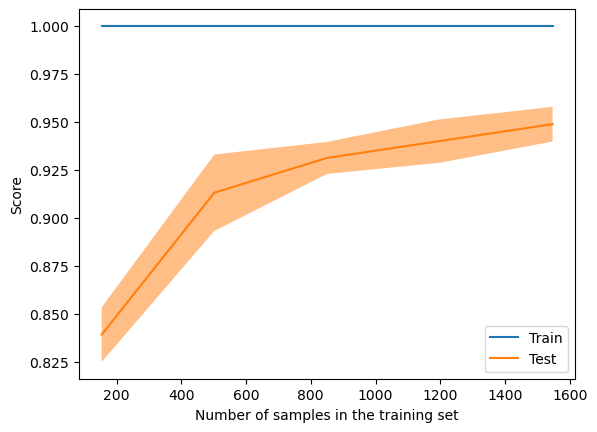

In [33]:
train_sizes, train_scores, test_scores = learning_curve(XGB_Classifier, X_train, y_train)
display = LearningCurveDisplay(train_sizes=train_sizes,train_scores=train_scores, test_scores=test_scores, score_name="Score")
display.plot()
plt.show()

#### Show Accuracy

In [34]:
print(f'Accuracy Report :\n{classification_report(y_test,XGB_pred)}')
print(f'Accuracy Score : {(accuracy_score(y_test,XGB_pred))}')

Accuracy Report :
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       138
           1       0.95      0.92      0.93        77

    accuracy                           0.95       215
   macro avg       0.95      0.95      0.95       215
weighted avg       0.95      0.95      0.95       215

Accuracy Score : 0.9534883720930233


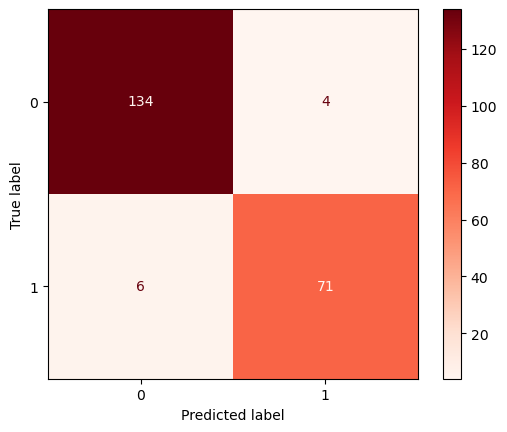

In [35]:
ConfusionMatrixDisplay.from_predictions(y_test,XGB_pred, cmap='Reds')
plt.show()

### Visualizing of Important Features To The Model


In [36]:
XGB_feature_importances = pd.DataFrame({'Feature': XGB_Classifier.feature_names_in_,'Importance': XGB_Classifier.feature_importances_})

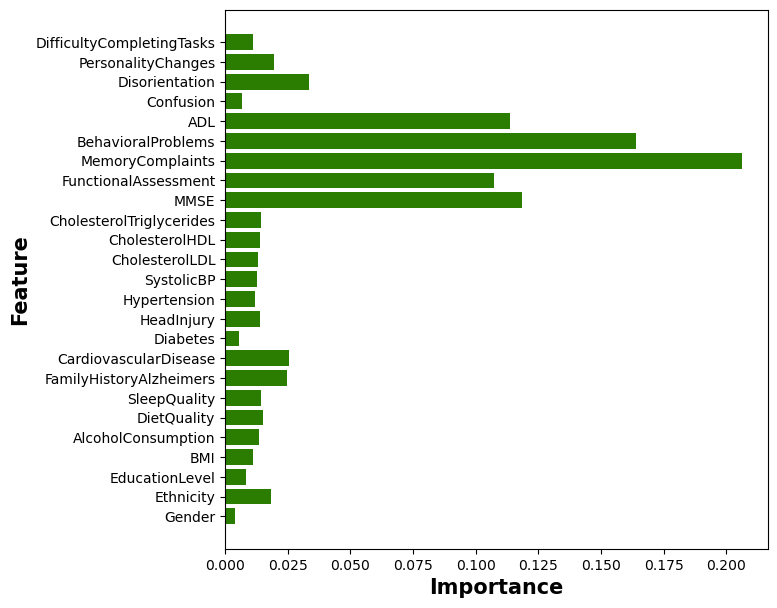

In [37]:
plt.figure(figsize = (7,7))

plt.barh(XGB_feature_importances['Feature'], 
         XGB_feature_importances['Importance'],
         color = '#2a7d00')

plt.xlabel('Importance', weight = 'bold', fontsize = 15)
plt.ylabel('Feature', weight = 'bold', fontsize = 15)

plt.show()

## Saving Model 

In [38]:
import pickle as pkl 

with open('Alzheimer\'s_Disease_Prediction.pkl' , 'wb') as file :
    pkl.dump(XGB_Classifier , file)

## Loading Model 

In [39]:
with open('Alzheimer\'s_Disease_Prediction.pkl' , 'rb') as file : 
    loaded_model = pkl.load(file)